In [3]:
import pandas as pd
import numpy as np

In [112]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [113]:
df = pd.concat([train,test]).reset_index(drop=True)

In [115]:
test.shape

(6000, 29)

In [116]:
df.shape

(28005, 30)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28005 entries, 0 to 28004
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              28005 non-null  object 
 1   job_duration_in_current_job_level      28005 non-null  float64
 2   person_level                           28005 non-null  object 
 3   job_duration_in_current_person_level   28005 non-null  float64
 4   job_duration_in_current_branch         28005 non-null  float64
 5   Employee_type                          27993 non-null  object 
 6   Employee_status                        28005 non-null  object 
 7   gender                                 28005 non-null  object 
 8   age                                    28005 non-null  int64  
 9   marital_status_maried(Y/N)             28005 non-null  object 
 10  number_of_dependences                  28005 non-null  int64  
 11  nu

In [118]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0.0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0.0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0.0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0.0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1.0,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


# Achievement Target 1

In [119]:
df['achievement_target_1'].value_counts()

achiev_50%-100%           10585
achiev_100%-150%           3475
achiev_< 50%               2938
Pencapaian 50%-100%        2182
achiev_> 1.5                836
Pencapaian 100%-150%        701
Pencapaian < 50%            247
Tidak diberikan target      238
Pencapaian > 1.5             76
Name: achievement_target_1, dtype: int64

In [120]:
df.groupby(['achievement_target_1'])['Best Performance'].value_counts(normalize=True)

achievement_target_1    Best Performance
Pencapaian 100%-150%    0.0                 0.868041
                        1.0                 0.131959
Pencapaian 50%-100%     0.0                 0.866101
                        1.0                 0.133899
Pencapaian < 50%        0.0                 0.857143
                        1.0                 0.142857
Pencapaian > 1.5        0.0                 0.938776
                        1.0                 0.061224
Tidak diberikan target  0.0                 0.837079
                        1.0                 0.162921
achiev_100%-150%        0.0                 0.857086
                        1.0                 0.142914
achiev_50%-100%         0.0                 0.845943
                        1.0                 0.154057
achiev_< 50%            0.0                 0.847458
                        1.0                 0.152542
achiev_> 1.5            0.0                 0.845896
                        1.0                 0.154104
Name:

In [121]:
df['achievement_target_1'].apply(achievement_target1).value_counts()

achiev_50%-100%           12767
achiev_100%-150%           4176
achiev_< 50%               3185
achiev_> 1.5                912
Tidak diberikan target      238
Name: achievement_target_1, dtype: int64

In [122]:
df['achievement_target_1'].apply(achievement_target1).value_counts().sum()

21278

# Achievement Target 2

In [123]:
df['achievement_target_2'].value_counts().sum()

21278

In [124]:
df.groupby(['achievement_target_2'])['Best Performance'].value_counts(normalize=True)

achievement_target_2    Best Performance
Pencapaian 100%-150%    0.0                 0.868966
                        1.0                 0.131034
Pencapaian 50%-100%     0.0                 0.886364
                        1.0                 0.113636
Pencapaian < 50%        0.0                 0.860571
                        1.0                 0.139429
Pencapaian > 1.5        0.0                 0.859155
                        1.0                 0.140845
Tidak diberikan target  0.0                 0.880682
                        1.0                 0.119318
achiev_100%-150%        0.0                 0.871351
                        1.0                 0.128649
achiev_50%-100%         0.0                 0.845731
                        1.0                 0.154269
achiev_< 50%            0.0                 0.846779
                        1.0                 0.153221
achiev_> 1.5            0.0                 0.840671
                        1.0                 0.159329
Name:

In [125]:
def achievement_target2(x):
    if x == 'Pencapaian 50%-100%':
        return 'achiev_50%-100%'
    elif x == 'Pencapaian 100%-150%':
        return 'achiev_100%-150%'
    elif x == 'Pencapaian < 50%':
        return 'achiev_< 50%'
    elif x == 'Pencapaian > 1.5':
        return 'achiev_> 1.5'
    else:
        return x

In [126]:
df['achievement_target_2'].apply(achievement_target2).value_counts()

achiev_< 50%              14204
achiev_50%-100%            3912
achiev_100%-150%           1501
achiev_> 1.5               1426
Tidak diberikan target      235
Name: achievement_target_2, dtype: int64

In [127]:
df['achievement_target_2'].apply(achievement_target2).value_counts().sum()

21278

# Achievement Target 3

In [128]:
def achievement_target3(x):
    if x == 'not reached':
        return 'not_reached'
    else:
        return x

In [129]:
df['achievement_target_3'].value_counts()

reached        15327
not reached     5929
not_reached       22
Name: achievement_target_3, dtype: int64

In [130]:
df['achievement_target_3'].value_counts().sum()

21278

In [131]:
df.groupby(['achievement_target_3'])['Best Performance'].value_counts(normalize=True)

achievement_target_3  Best Performance
not reached           0.0                 0.838129
                      1.0                 0.161871
not_reached           0.0                 0.722222
                      1.0                 0.277778
reached               0.0                 0.856259
                      1.0                 0.143741
Name: Best Performance, dtype: float64

In [132]:
df['achievement_target_3'].apply(achievement_target3).value_counts()

reached        15327
not_reached     5951
Name: achievement_target_3, dtype: int64

# Year Graduated

In [133]:
df['year_graduated'].value_counts()

2011    3183
2013    3035
2012    2932
2010    2651
2014    2332
2009    2029
2008    1699
2007    1034
2015    1022
2006     642
0        521
2005     475
2004     443
2016     436
2003     390
2002     300
2017     225
2001     190
\N       118
2000     104
9999     104
2018      77
1999      67
1996      65
1998      50
1995      45
1994      41
1993      31
2999      24
1987      23
1992      23
1988      22
1997      22
1986      20
1989      19
1991      18
1985      16
2019      15
1990      15
2201       9
1984       6
-          4
1983       4
2200       3
____       2
201        2
3.05       1
2020       1
207        1
1016       1
1982       1
2044       1
209        1
3.18       1
102        1
.          1
9464       1
2031       1
3016       1
3013       1
Name: year_graduated, dtype: int64

In [134]:
df[(df['year_graduated']>='1900')&(df['year_graduated']<='2020')]['year_graduated']

0        1987
1        2001
2        2007
3        2006
6        2008
         ... 
27999    2011
28001    2011
28002    2009
28003    2008
28004    2011
Name: year_graduated, Length: 23705, dtype: object

In [135]:
df.shape

(28005, 30)

In [136]:
def year_graduated(x):
    try:
        x = int(x)
        if not (x >= 1900 and x <= 2020):
            return 'invalid'
        else:
            return x
    except:
        x = x
        return x

In [137]:
df['year_graduated'].apply(year_graduated).head()

0    1987
1    2001
2    2007
3    2006
4     NaN
Name: year_graduated, dtype: object

## Lot of Missing Value

In [138]:
df['year_graduated'].isnull().sum()

3503

In [139]:
df.groupby(['year_graduated'])['Best Performance'].value_counts(normalize=True)

year_graduated  Best Performance
-               0.0                 0.750000
                1.0                 0.250000
0               0.0                 0.888636
                1.0                 0.111364
102             0.0                 1.000000
                                      ...   
9999            0.0                 0.772727
                1.0                 0.227273
\N              0.0                 0.770115
                1.0                 0.229885
____            0.0                 1.000000
Name: Best Performance, Length: 92, dtype: float64

# GPA

In [140]:
df.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'Employee_status',
       'gender', 'age', 'marital_status_maried(Y/N)', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal',
       'achievement_target_1', 'achievement_target_2', 'achievement_target_3'],
      dtype='object')

In [141]:
df['GPA'].value_counts()

0.00      5099
3.00       724
3.01       477
3.14       398
3.10       392
          ... 
318.00       1
270.00       1
2.33         1
2.10         1
47.60        1
Name: GPA, Length: 273, dtype: int64

In [142]:
df[(df['GPA']>=0) & (df['GPA']<=4)]['GPA']

0        2.32
1        3.25
2        3.23
3        0.00
6        3.65
         ... 
28000    0.00
28001    3.40
28002    3.47
28003    3.22
28004    2.75
Name: GPA, Length: 24409, dtype: float64

In [143]:
df[(df['GPA']>=0) & (df['GPA']<=4)]['GPA']

0        2.32
1        3.25
2        3.23
3        0.00
6        3.65
         ... 
28000    0.00
28001    3.40
28002    3.47
28003    3.22
28004    2.75
Name: GPA, Length: 24409, dtype: float64

In [153]:
def gpa(x):
    if not (x>=0 and x <= 4):
        return 'invalid'
    else:
        return 'valid'

In [154]:
df['GPA']

0        2.32
1        3.25
2        3.23
3        0.00
4         NaN
         ... 
28000    0.00
28001    3.40
28002    3.47
28003    3.22
28004    2.75
Name: GPA, Length: 28005, dtype: float64

In [156]:
df['GPA'].apply(gpa).value_counts()

valid      24409
invalid     3596
Name: GPA, dtype: int64

In [147]:
df['GPA'].apply(gpa).value_counts()

0.0        5099
invalid    3596
3.0         724
3.01        477
3.14        398
           ... 
2.52          1
2.06          1
2.38          1
2.35          1
3.97          1
Name: GPA, Length: 185, dtype: int64

In [148]:
df.groupby(['Education_level'])['GPA'].mean()

Education_level
level_0     0.343000
level_1     5.282310
level_2     1.787778
level_3     2.652646
level_4     3.010744
level_5    10.808444
Name: GPA, dtype: float64

In [157]:
df['GPA_edited']=df['GPA'].apply(gpa)

In [158]:
df.groupby(['GPA_edited'])['Best Performance'].value_counts(normalize=True)

GPA_edited  Best Performance
invalid     0.0                 0.846132
            1.0                 0.153868
valid       0.0                 0.885068
            1.0                 0.114932
Name: Best Performance, dtype: float64

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

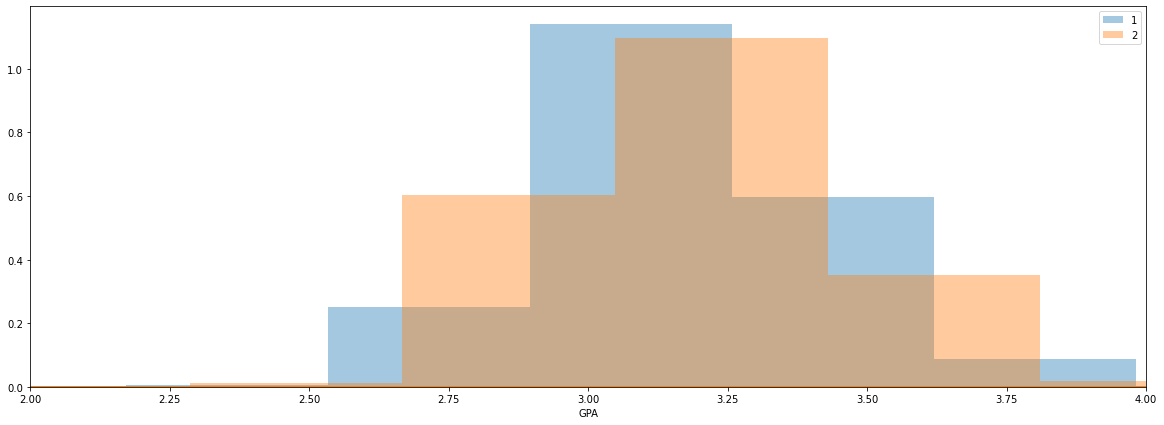

In [172]:
plt.figure(figsize=(20,7))

sns.distplot(df[df['Best Performance']==1]['GPA'],bins=1000,label='1')
sns.distplot(df[df['Best Performance']==0]['GPA'],bins=1000,label='2')

plt.legend()
plt.xlim(2,4)
plt.show()

# Job Level

In [149]:
df['job_level'].value_counts()

JG04    24750
JG03     2006
JG05     1242
JG06        7
Name: job_level, dtype: int64

In [150]:
df.groupby(['job_level'])['Best Performance'].value_counts(normalize=True)

job_level  Best Performance
JG03       0.0                 0.993467
           1.0                 0.006533
JG04       0.0                 0.868097
           1.0                 0.131903
JG05       0.0                 0.849412
           1.0                 0.150588
JG06       0.0                 1.000000
Name: Best Performance, dtype: float64

# Person Level

In [151]:
df['person_level'].value_counts()

PG03    23496
PG01     1958
PG04     1244
PG06      704
PG05      515
PG02       45
PG07       40
PG08        3
Name: person_level, dtype: int64

In [152]:
df['person_level'].isnull().sum()

0

In [104]:
df.groupby(['person_level'])['Best Performance'].value_counts(normalize=True)

person_level  Best Performance
PG01          0                   0.995375
              1                   0.004625
PG02          0                   0.902439
              1                   0.097561
PG03          0                   0.868771
              1                   0.131229
PG04          0                   0.852540
              1                   0.147460
PG05          0                   0.873626
              1                   0.126374
PG06          0                   0.836820
              1                   0.163180
PG07          0                   0.833333
              1                   0.166667
PG08          0                   0.666667
              1                   0.333333
Name: Best Performance, dtype: float64

# Education Level

In [53]:
df['Education_level'].value_counts()

level_4    15313
level_3     2804
level_1      192
level_5       64
level_0       16
level_2        8
Name: Education_level, dtype: int64

In [55]:
df['Education_level'].isnull().sum()

3608

In [103]:
df.groupby(['Education_level'])['Best Performance'].value_counts(normalize=True)

Education_level  Best Performance
level_0          0                   0.937500
                 1                   0.062500
level_1          0                   0.822917
                 1                   0.177083
level_2          0                   1.000000
level_3          0                   0.884807
                 1                   0.115193
level_4          0                   0.885914
                 1                   0.114086
level_5          0                   0.843750
                 1                   0.156250
Name: Best Performance, dtype: float64